<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [23]:
from matplotlib import pyplot as plt
import numpy as np

### 1.2 NumPy’s PRNG

In [2]:
np.random.rand()
np.random.rand(10)
np.random.rand(5,2) #5 sets of 2 numbers
n = 10000
random_numbers = np.random.rand(n)
np.sum(random_numbers < .5) / n*100 #percentage of numbers that are less than 50%
np.sum(random_numbers <.25) /n*100 #percentage of numbers that are less than 25%
np.sum(random_numbers >.75)/n*100 #percentage of numbers that are less than 75%

25.5

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

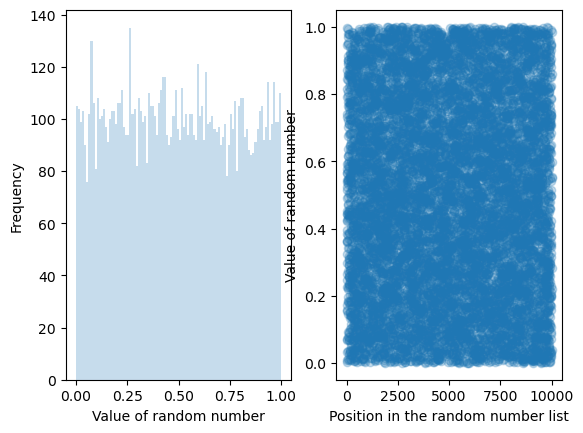

In [3]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

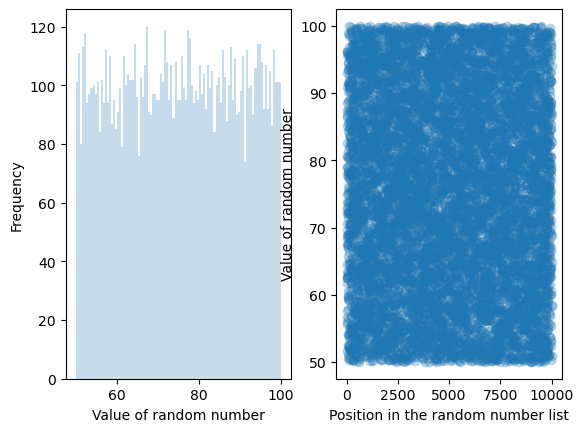

In [4]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG

In [5]:
np.random.randint(0,100,10)#Ten integers between 0 and 100

array([38, 22, 21, 20, 28,  9, 41, 40, 37,  0])

In [6]:
np.random.randint(0, 100, 10) # Another ten integers between 0 and 100

array([16, 65, 98, 66, 86,  6, 52, 92,  6, 13])

In [7]:
np.random.seed(1234) #speed number
np.random.randint(0,100,10) #Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [8]:
np.random.seed(1234) #speed number
np.random.randint(0,100,10) #Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [9]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

In [10]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n') #what does \n do?

Q: Will I be pretty?
A: Ask again later.

Q: Will I be rich?
A: Better not tell you now.

Q: Will I be in trouble?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [11]:
np.random.choice(['Head', 'Tails'])

'Head'

In [12]:
no_of_coins=10
np.random.choice(['Heads', 'Tails'], no_of_coins)

array(['Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Tails',
       'Heads', 'Heads', 'Tails'], dtype='<U5')

In [13]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    'probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [14]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 51.60%


### 3.2 A biased coin

In [15]:
no_of_coins = 1_000
no_of_heads=flip_coins(no_of_coins, probability=.3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 66.70%


### 3.3 A flipping experiment

In [16]:
no_of_repeats = 10_000
results = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_count = np.unique(results, return_counts=True)
heads_probability = heads_count/no_of_repeats

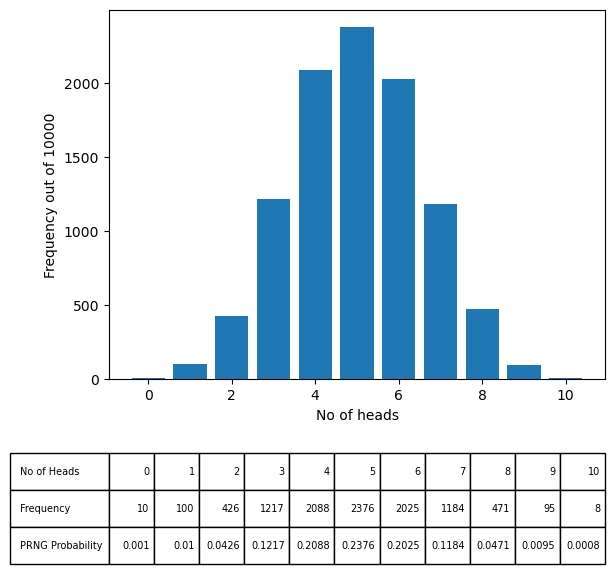

In [25]:
from scipy.stats import binom
# plt.rcParam['figure.figsize'] = (10,5) (Prof told me to ignore this for now, but he explained how it works)
plt.bar(no_of_heads, heads_count);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_count, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

## Exercise 1 :  12C, 13C

In [31]:
def H13C(C=27, probability= 0.0111):
    results = np.random.rand(C)
    no_of_13C=np.sum(results<probability)
    return no_of_13C

number_list = [H13C() for i in range(10000)]

print(f'mean = {np.mean(number_list)}')
print(f'standard deviation = {np.std(number_list)}')

mean = 0.304
standard deviation = 0.5498945353429147


In [32]:
probability_no_HC=number_list.count(0)/10000
print(f' The probability is {probability_no_HC}')


 The probability is 0.7371
